<a href="https://colab.research.google.com/github/YusriaAhmed/YusriaAhmed/blob/main/airlines_booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Airline Booking Data Project                      

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('C:\\Users\yusri\\Downloads\\Passanger_booking_data.csv')

In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


In [ ]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [ ]:
print (f'The Dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

The Dataset contains 50002 rows and 14 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50002 non-null  int64  
 1   sales_channel          50002 non-null  object 
 2   trip_type              50002 non-null  object 
 3   purchase_lead          50002 non-null  int64  
 4   length_of_stay         50002 non-null  int64  
 5   flight_hour            50002 non-null  int64  
 6   flight_day             50002 non-null  object 
 7   route                  50002 non-null  object 
 8   booking_origin         50002 non-null  object 
 9   wants_extra_baggage    50002 non-null  int64  
 10  wants_preferred_seat   50002 non-null  int64  
 11  wants_in_flight_meals  50002 non-null  int64  
 12  flight_duration        50002 non-null  float64
 13  booking_complete       50002 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
# static about dataset
df.describe().style.background_gradient(cmap='bone_r')

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000
mean,1.591256,84.940582,23.044778,9.066277,0.668773,0.296968,0.427143,7.277524,0.149574
std,1.020167,90.450548,33.887171,5.412569,0.470659,0.456927,0.494668,1.496854,0.356657
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [ ]:
df.describe(include='O')

,sales_channel,trip_type,flight_day,route,booking_origin
count,50002,50002,50002,50002,50002
unique,2,3,7,799,104
top,Internet,RoundTrip,Mon,AKLKUL,Australia
freq,44383,49498,8102,2680,17873


In [ ]:
# checking the null values in dataset
df.isnull().sum()/len(df)*100

num_passengers           0.0
sales_channel            0.0
trip_type                0.0
purchase_lead            0.0
length_of_stay           0.0
flight_hour              0.0
flight_day               0.0
route                    0.0
booking_origin           0.0
wants_extra_baggage      0.0
wants_preferred_seat     0.0
wants_in_flight_meals    0.0
flight_duration          0.0
booking_complete         0.0
dtype: float64

In [ ]:
# checking the duplicate values
duplicate_values=df.duplicated().sum()
print(f' The dataset contains {duplicate_values} duplicate_values')

 The dataset contains 719 duplicate_values


In [ ]:
# drop the duplicate values
df=df.drop_duplicates()
df.shape

(49283, 14)

# 💡  About the DataSet

    .#### Data Size: The dataset contains 49283 rows and 14 columns.

    .### Data Types: The data contains features with data types int64, Object, Binary and
    float64.

    .### Missing Values: No column has missing values in the dataset, which is a great sign
    and simplifies the data cleaning process.

    .### Unique Values: The number of unique values varies among features.

    .#### Statistical Details: The 'min', 'max', 'average', and 'standard deviation' values indicate
    the range and dispersion of data for each column, highlighting potential outliers or
    anomalies.

    .#### Irrelevant Features: All the Features seems important and useful for final evaluation.

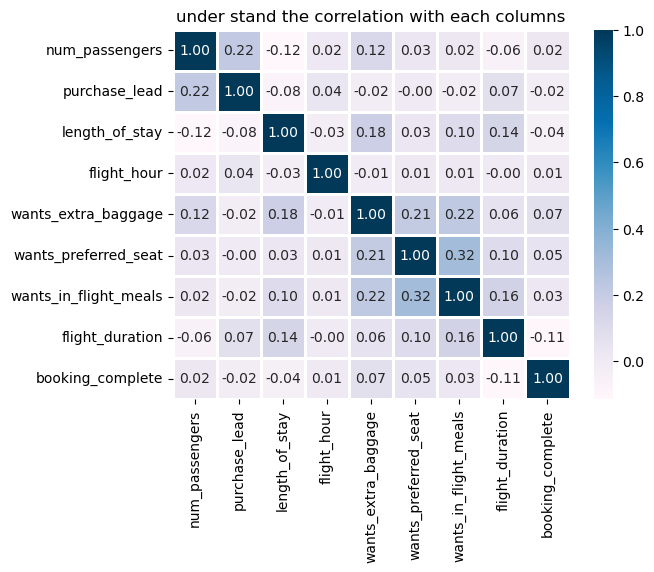

In [ ]:
# visulize the correlation map
sns.heatmap(df.corr(),annot=True,cmap='PuBu',fmt='.2f',
            annot_kws=None,
            linewidths=1,)
plt.title('under stand the correlation with each columns')
plt.show()

# Explor Data Analysis

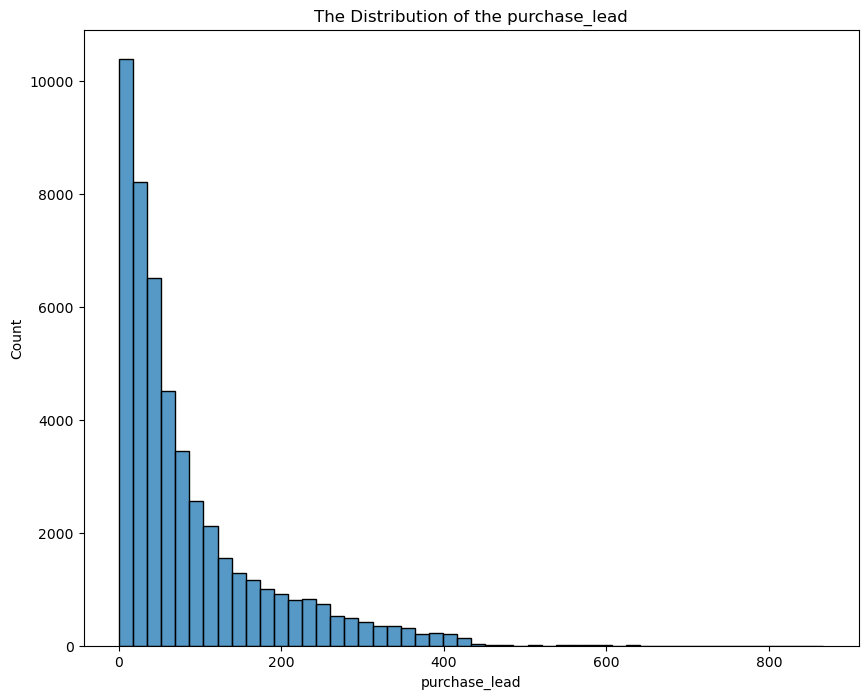

In [ ]:
# Distribution of the num of passengers
plt.figure(figsize=(10,8))
sns.histplot(df['purchase_lead'],bins=50)
plt.title('The Distribution of the purchase_lead')
plt.show()

Text(0, 0.5, 'count of values')

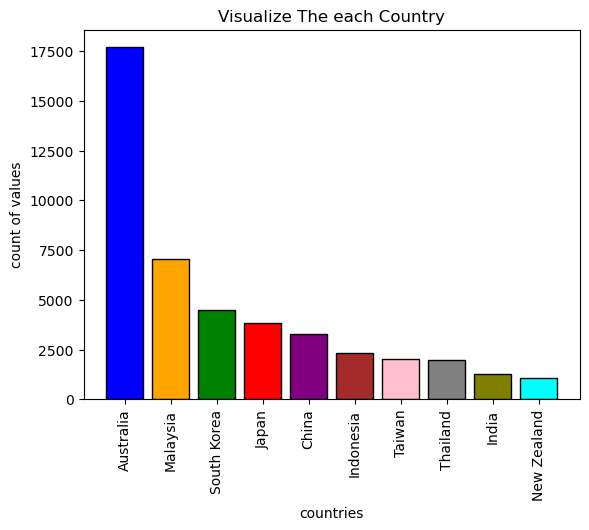

In [ ]:
# create a bar plot visualize the top 10 most demanding origin
top_10_origins = df['booking_origin'].value_counts().nlargest(10)
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
plt.bar(top_10_origins.index, top_10_origins.values,color=colors, edgecolor='k')
plt.title('Visualize The each Country')
plt.xlabel('countries')
plt.xticks(rotation=90)
plt.ylabel('count of values')

In [ ]:
df.booking_complete.value_counts()

0    41891
1     7392
Name: booking_complete, dtype: int64

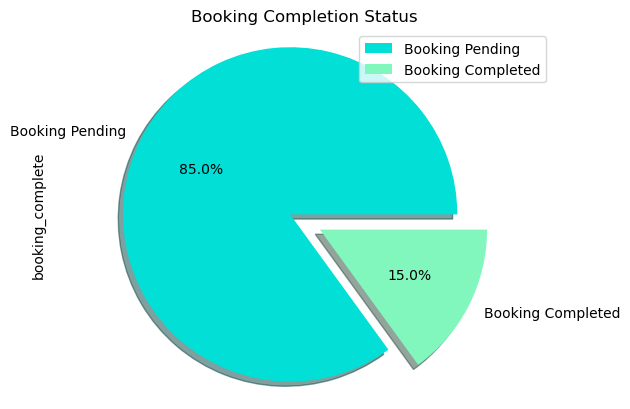

In [ ]:
# Assuming 'df' is your DataFrame
booking_complete_counts = df['booking_complete'].value_counts()
booking_complete_counts.plot(kind='pie', autopct='%1.1f%%', explode=[0,0.2],labels=['Booking Pending', 'Booking Completed'],
                            colors=['#01DFD7','#81F7BE'],
                            shadow=True)
plt.title('Booking Completion Status')
plt.axis('equal')
plt.legend()
plt.show()

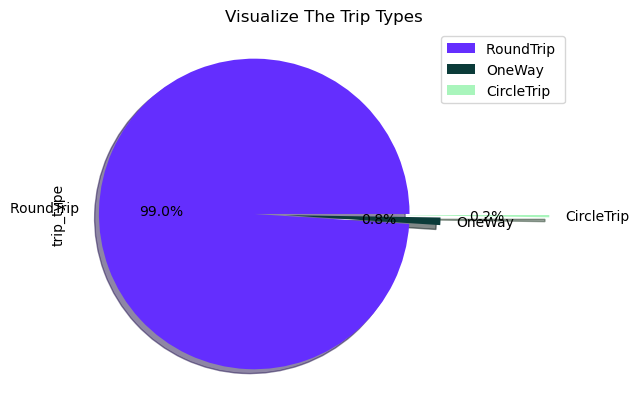

In [ ]:
booking_complete_counts = df['trip_type'].value_counts()
booking_complete_counts.plot(kind='pie', autopct='%1.1f%%',explode=[0,0.2,0.9],labels=['RoundTrip ', 'OneWay','CircleTrip'],
                            colors=['#642EFE','#0B3B39','#A9F5BC'],
                            shadow=True)
plt.title('Visualize The Trip Types')
plt.axis('equal')
plt.legend()
plt.show()

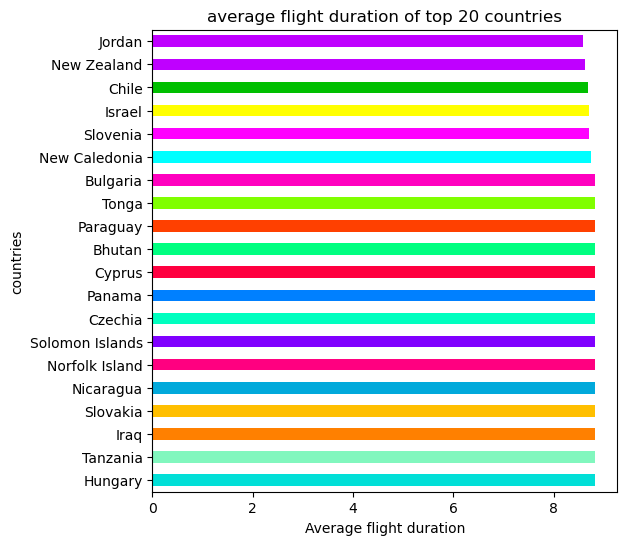

In [ ]:
# average flight duration of top 20 destination in bar chart
colors = ['#01DFD7', '#81F7BE', '#FF8000', '#FFBF00', '#01A9DB', '#FF0080', '#8000FF', '#00FFBF', '#0080FF', '#FF0040',
          '#00FF80', '#FF4000', '#80FF00', '#FF00BF', '#00FFFF', '#FF00FF', '#FFFF00', '#00BF00', '#BF00FF', '#BF00FF']
df.groupby('booking_origin')['flight_duration'].mean().sort_values(ascending=False).head(20).plot(kind='barh',
        figsize=(6, 6), color=colors)
plt.title('average flight duration of top 20 countries')
plt.xlabel('Average flight duration')
plt.ylabel('countries')
plt.show()

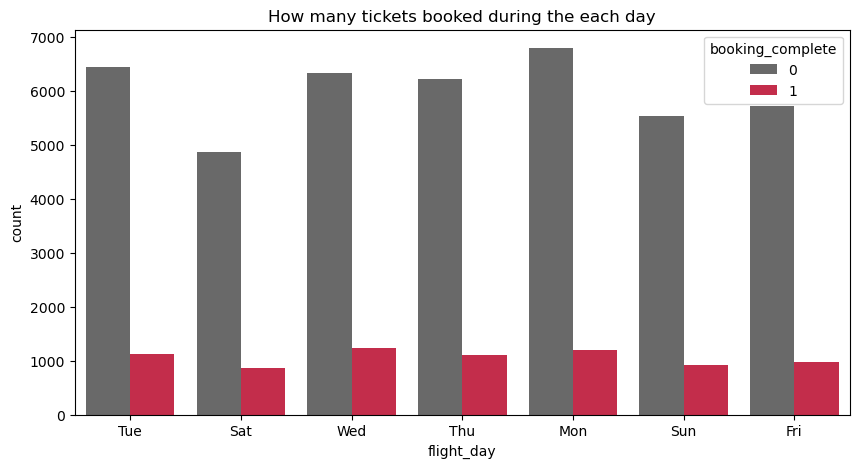

In [ ]:
# create countplot understand the booking status on the flight day
plt.figure(figsize=(10,5))
sns.countplot(x=df['flight_day'],hue=df['booking_complete'], palette=['dimgrey', 'crimson'])
plt.title('How many tickets booked during the each day')
plt.show()

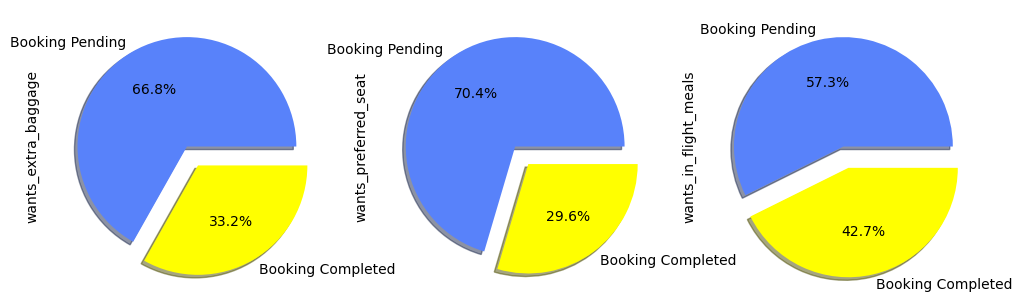

In [ ]:
#create a data frame for the extra
df2=['wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals']

plt.figure(figsize=(12,5))
for i,j in enumerate(df2):
    plt.subplot(1,3,i+1)
    df[j].value_counts().plot(kind='pie',explode=[0,0.2],
    labels=['Booking Pending', 'Booking Completed'],
    colors=['#5882FA','#FFFF00'],
    autopct='%1.1f%%',
    shadow=True)

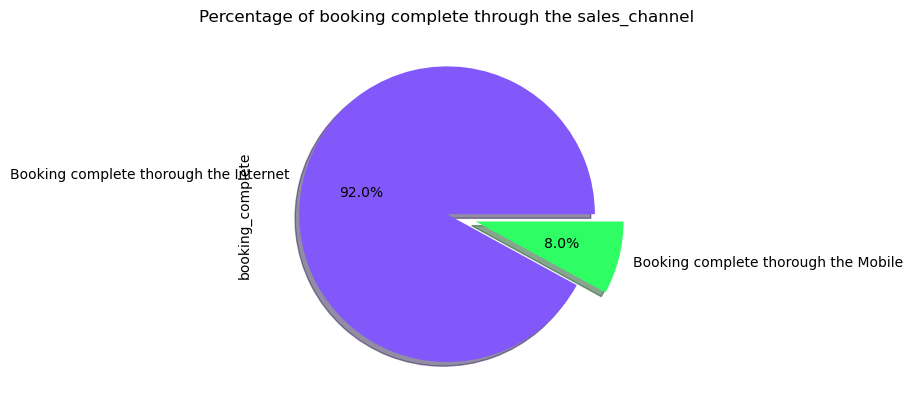

In [ ]:
df.groupby('sales_channel')['booking_complete'].sum().plot(kind='pie',
   explode=[0,0.2],
   labels=['Booking complete thorough the Internet','Booking complete thorough the Mobile'],
   colors=['#8258FA','#2EFE64'],
   autopct='%1.1f%%',
   shadow=True)
plt.title('Percentage of booking complete through the sales_channel')
plt.show()

In [ ]:
round_trip = df[df['trip_type'] == 'RoundTrip']
round_trip.groupby(['flight_day'])[['booking_complete']].value_counts().sort_values(ascending=False).unstack()\
.style.background_gradient(cmap='PuBuGn_r')

booking_complete,0,1
flight_day,,
Fri,5647,971
Mon,6724,1191
Sat,4809,853
Sun,5465,911
Thu,6151,1104
Tue,6350,1115
Wed,6267,1222


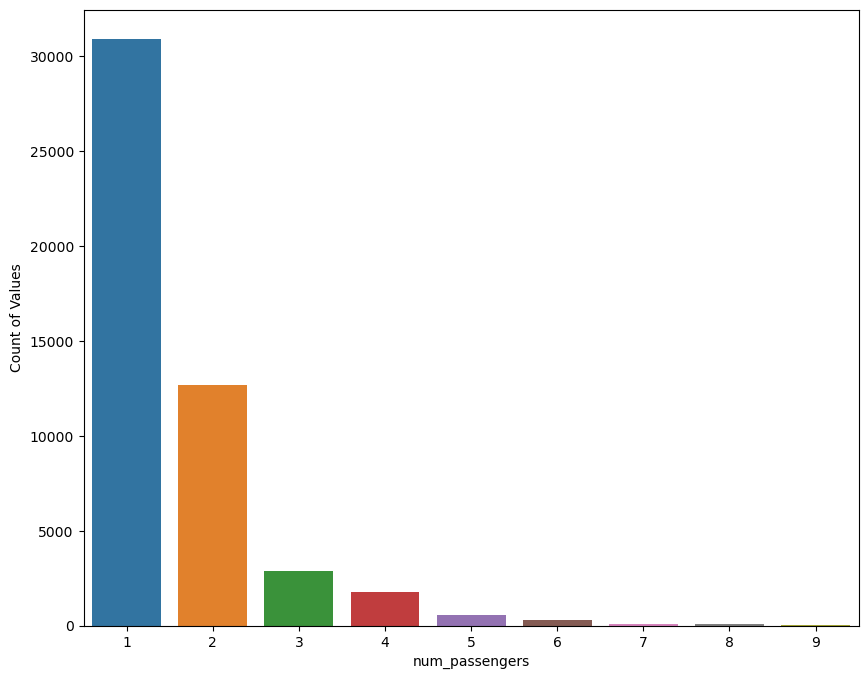

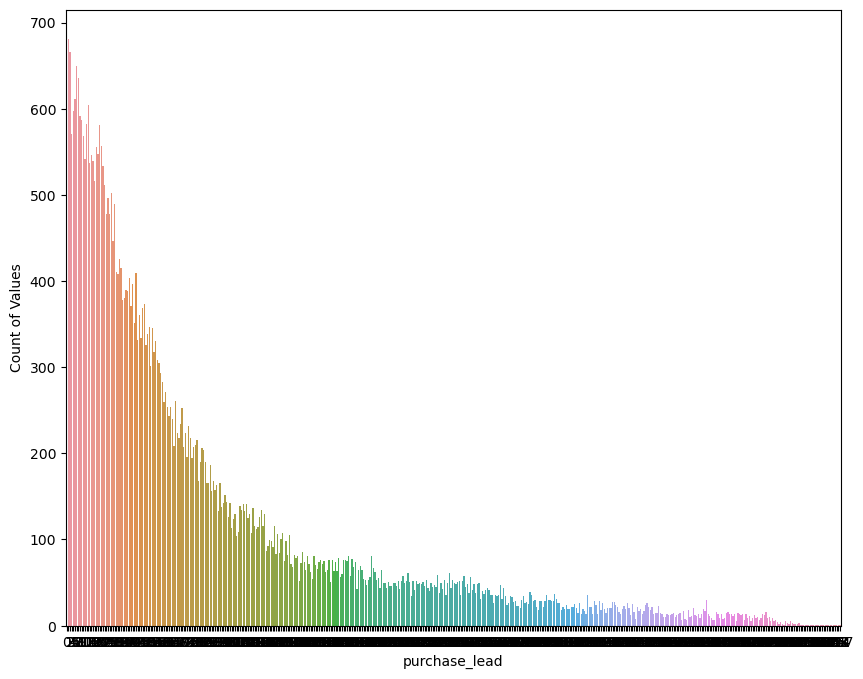

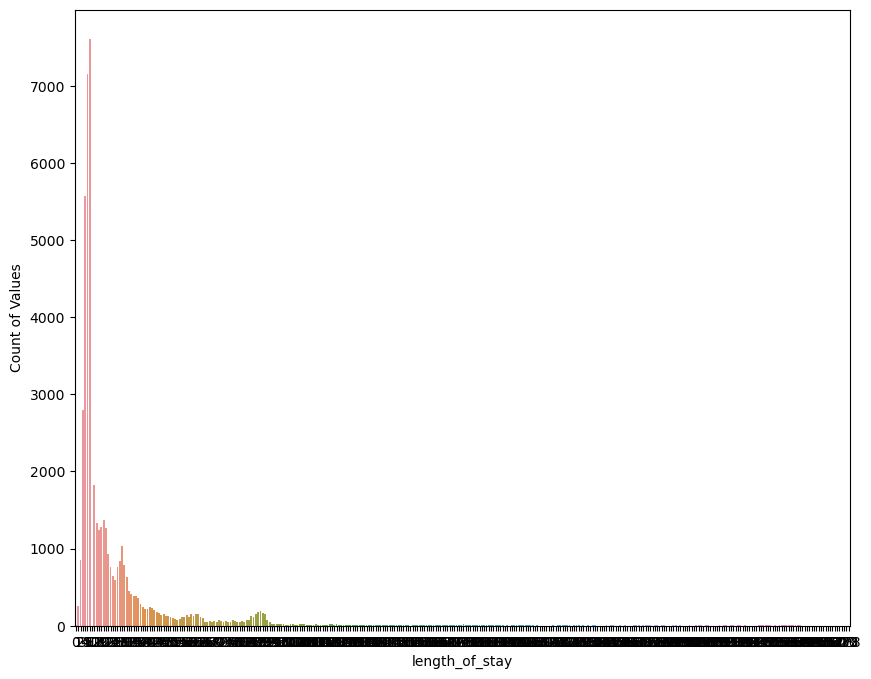

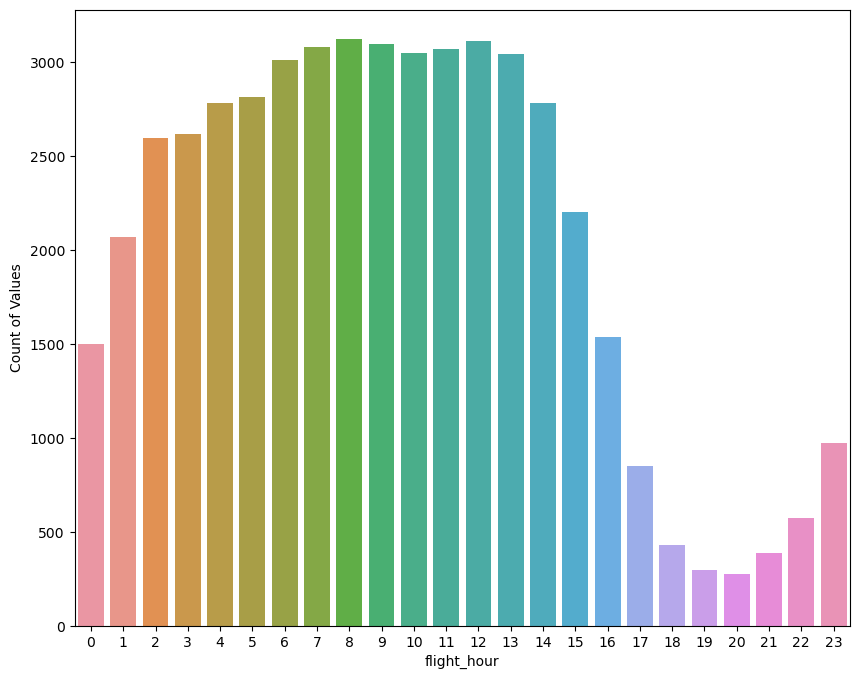

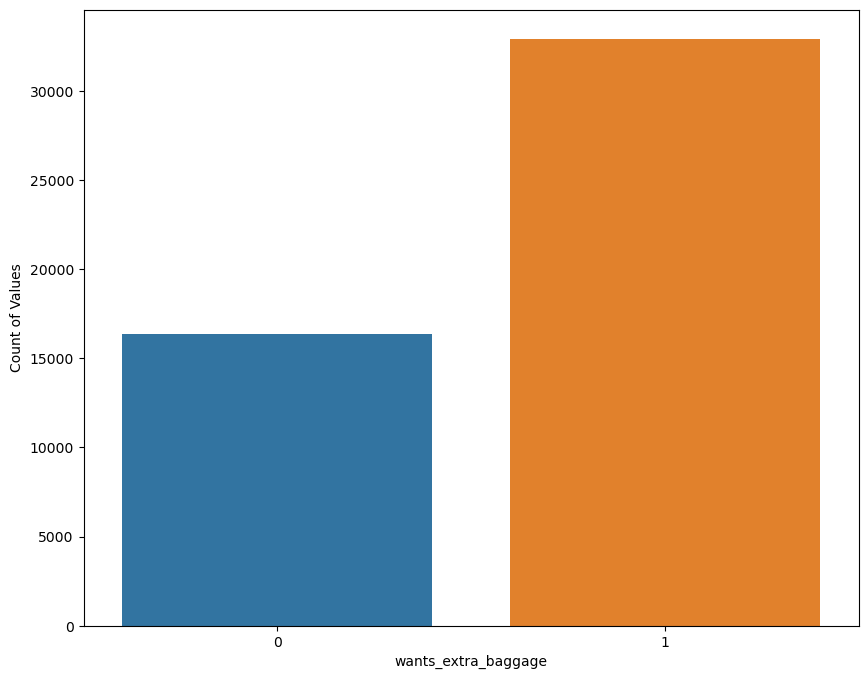

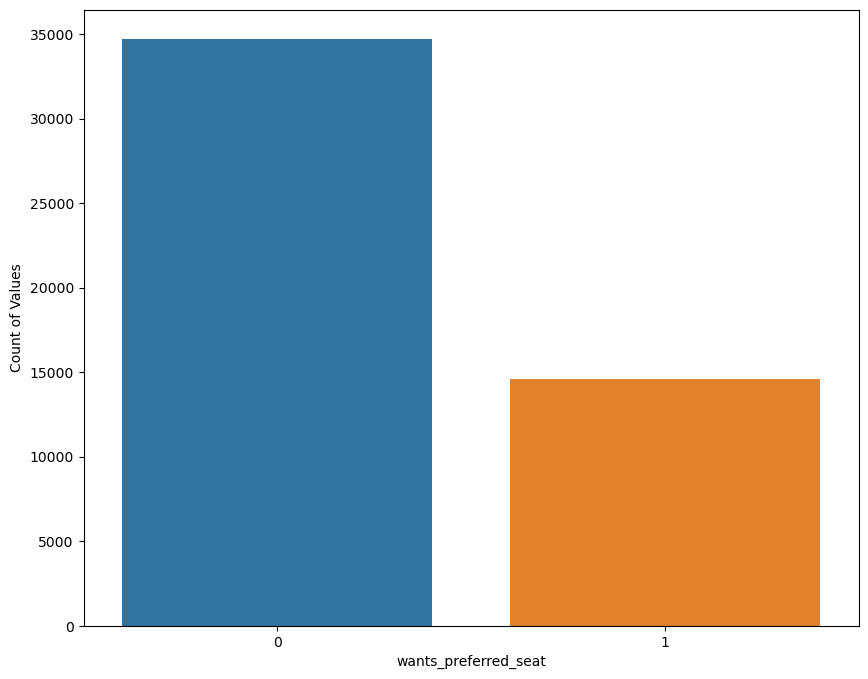

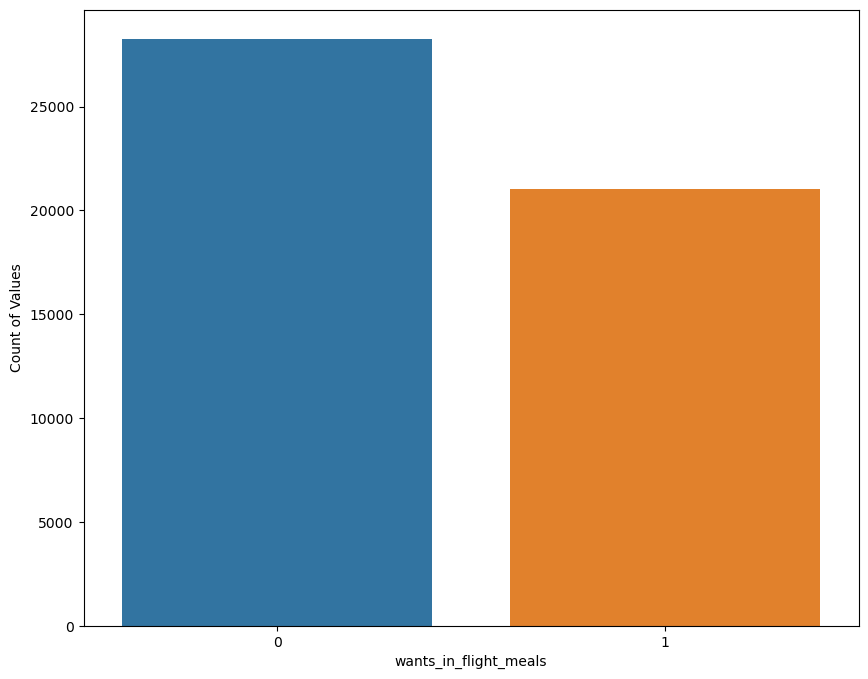

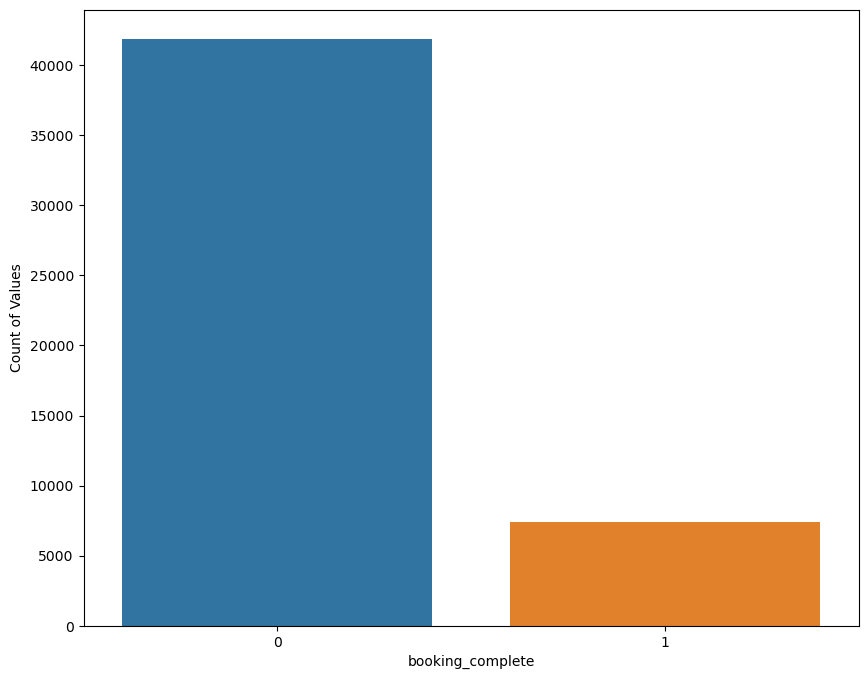

In [ ]:
for i in df.select_dtypes(include='int'):
    plt.figure(figsize=(10,8))
    sns.countplot(x=df[i])
    plt.xlabel(f'{i}')
    plt.ylabel('Count of Values')
    plt.show()

In [ ]:
df.groupby(['sales_channel'])[['flight_day']].value_counts().sort_values(ascending=False).unstack()\
.style.background_gradient(cmap='gist_heat_r')

flight_day,Fri,Mon,Sat,Sun,Thu,Tue,Wed
sales_channel,,,,,,,
Internet,5897,7197,4965,5591,6606,6827,6835
Mobile,788,791,758,851,717,732,728


In [ ]:
# Find the busiest and least busy days in terms of flight bookings
busiest_day = df['flight_day'].value_counts().idxmax()
least_busy_day = df['flight_day'].value_counts().idxmin()

print('The busiest day in the flight booking counter:', busiest_day)
print('The least busy day in the flight booking counter:', least_busy_day)

# Find the busiest and least busy booking origins
busiest_origin = df['booking_origin'].value_counts().idxmax()
least_busy_origin = df['booking_origin'].value_counts().idxmin()

print('*************************************************')
print('The busiest booking origin:', busiest_origin)
print('The least busy booking origin:', least_busy_origin)

The busiest day in the flight booking counter: Mon
The least busy day in the flight booking counter: Sat
*************************************************
The busiest booking origin: Australia
The least busy booking origin: Vanuatu


In [ ]:
pd.pivot_table(df,index='booking_origin',columns='flight_day',values='booking_complete').style.background_gradient(cmap='icefire')

flight_day,Fri,Mon,Sat,Sun,Thu,Tue,Wed
booking_origin,,,,,,,
(not set),0.272727,0.000000,1.000000,0.166667,0.076923,0.076923,0.428571
Afghanistan,nan,nan,nan,nan,0.000000,nan,nan
Algeria,nan,nan,nan,nan,0.000000,nan,nan
Argentina,nan,0.000000,nan,nan,0.000000,0.000000,0.000000
Australia,0.043275,0.050264,0.053197,0.049311,0.054953,0.050225,0.052612
Austria,0.000000,0.000000,nan,0.000000,0.000000,nan,0.000000
Bahrain,nan,nan,0.500000,nan,0.666667,nan,nan
Bangladesh,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.200000
Belarus,0.000000,nan,nan,nan,nan,nan,nan


# Observations:

. During the Exploratory Data Analysis (EDA) phase, we identified several interesting insights.

. The distribution plot revealed that the majority of purchase leads fall within the range of
  200 to 400.

. Australia recorded the highest number of purchase leads, followed by Malaysia in second
  place.

. Only 15% of the leads resulted in ticket bookings, indicating that 85% did not convert.

. Countries like Jordan and New Zealand had a higher average flight duration compared to
  others.

. The pie chart showed that 92% of bookings were completed through the internet, while 8%
  were completed via mobile devices